In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [65]:
from sklearn.datasets import load_boston


In [66]:
boston=load_boston()

In [67]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [68]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [69]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [70]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [71]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [72]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [73]:
x=boston.data

In [74]:
y=boston.target

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [76]:
x_train.shape

(339, 13)

In [77]:
y_train.shape

(339,)

In [78]:
x_test.shape

(167, 13)

In [79]:
y_test.shape

(167,)

In [80]:
lm=LinearRegression()

In [81]:
lm.fit(x_train,y_train)

LinearRegression()

In [82]:
lm.score(x_train,y_train)

0.7665529829880267

In [83]:
lm.coef_

array([-1.10843155e-01,  3.66995321e-02,  8.74460015e-03,  3.32218225e+00,
       -1.71846638e+01,  4.81511727e+00, -1.38022222e-02, -1.44146494e+00,
        2.63392383e-01, -1.17496784e-02, -9.25130518e-01,  9.07087108e-03,
       -4.12146398e-01])

In [84]:
pred=lm.predict(x_test)
print('Predicted result price:',pred)
print('actual price:',y_test)

Predicted result price: [15.84192559 32.20569827 24.42230605 30.84928633 27.31927564 19.65311852
 23.05432432 31.7229619  32.45933432 22.63205367 24.91948411 27.15339443
 20.16729816 27.95837435 32.02171343 10.19889234 36.05901216 14.96179519
 11.66767994 15.55657875 35.22194463 22.20185653 38.8142947  20.4290284
 28.49163796 19.08044635 24.02797912 20.78907881 19.65030776 26.41697272
 14.14117934 25.89121978 17.77544803  8.02793933 32.83228276 19.02926719
 12.35104367 27.13926668 22.64549403 18.75190375 23.67614267 25.19654715
 37.31343761 21.2740326  32.30876439 20.32537386  7.41789113 28.06144027
 36.28142462 21.53339694 28.92419026 23.82647841  7.34739041 24.23067937
  6.12843722 21.90316166 18.29285279 13.19056989  5.99004693 30.08061674
 12.37541899 17.83046748 18.15297944 19.08005857 42.19993227 22.50076808
 20.52857282 23.9328331  25.64429237 27.51546185 29.74089548 19.64560651
 24.62720513 22.8048752  30.94928878 13.76556158 17.76806882 20.21873241
 16.61941218 17.13960152  2.

In [85]:
print('error:')
print(mean_squared_error(pred,y_test))


error:
27.420728209084526


In [86]:
from sklearn.linear_model import Lasso,Ridge

In [87]:
ls=Lasso(alpha=.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.7665529400345414

In [88]:
ls.coef_

array([-1.10824693e-01,  3.67066154e-02,  8.58729659e-03,  3.32038457e+00,
       -1.71509902e+01,  4.81528448e+00, -1.38318082e-02, -1.44099502e+00,
        2.63304303e-01, -1.17526095e-02, -9.24709393e-01,  9.07325563e-03,
       -4.12162696e-01])

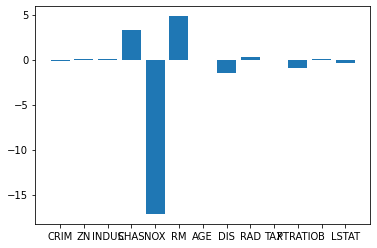

In [89]:
plt.bar(boston.feature_names,ls.coef_)
plt.show()

In [90]:
rd=Ridge(alpha=.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.7665529828886578

In [91]:
rd.coef_

array([-1.10842268e-01,  3.66998800e-02,  8.73686616e-03,  3.32215005e+00,
       -1.71830063e+01,  4.81513570e+00, -1.38038984e-02, -1.44144307e+00,
        2.63388003e-01, -1.17498140e-02, -9.25109364e-01,  9.07099128e-03,
       -4.12146425e-01])

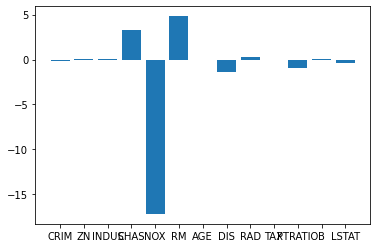

In [92]:
plt.bar(boston.feature_names,rd.coef_)
plt.show()

In [93]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.7665498739655396


array([-1.10686350e-01,  3.67611422e-02,  7.37727002e-03,  3.31588047e+00,
       -1.68916472e+01,  4.81825513e+00, -1.40961471e-02, -1.43758689e+00,
        2.62619134e-01, -1.17737697e-02, -9.21396641e-01,  9.09208744e-03,
       -4.12160129e-01])

In [94]:
from sklearn.svm import SVR

In [95]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
pred_y=svr.predict(x_test)
svr.score(x_train,y_train)

0.7390427904446701

In [96]:
svr=SVR(kernel='poly')
svr.fit(x_train,y_train)
pred_y=svr.predict(x_test)
svr.score(x_train,y_train)

0.21984205036201354

In [97]:
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
pred_y=svr.predict(x_test)
svr.score(x_train,y_train)

0.2292499655454553

In [98]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7390427904446701
0.21984205036201354
0.2292499655454553


Ensemble Techniques...Regressor

In [103]:
from sklearn.ensemble import RandomForestRegressor


In [104]:
from sklearn.metrics import r2_score

In [114]:
rf=RandomForestRegressor(n_estimators=500,random_state=45)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf))
print(rf.score(x_train,y_train))


0.8070258520125657
0.9773857175483154


In [115]:
from sklearn.ensemble import AdaBoostRegressor


In [125]:
ad=AdaBoostRegressor(n_estimators=150)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print(r2_score(y_test,pred_ad))
print(ad.score(x_train,y_train))


0.7419435110109502
0.9115625967455528
